In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data_csv/updated_city_region.csv', index_col=0)

In [3]:
df.head()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,date,month,month_num,region
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,4,January,1,Northeastern
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,4,January,1,Northeastern
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,4,January,1,Southeastern
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,4,January,1,Southeastern
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,4,January,1,Northeastern


In [4]:
df['type_enc'] = df['type'].map({
    "conventional": 0,
    "organic": 1
})

In [5]:
df.columns

Index(['average_price', 'total_volume', '4046', '4225', '4770', 'total_bags',
       'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'city',
       'date', 'month', 'month_num', 'region', 'type_enc'],
      dtype='object')

In [6]:
df.drop(columns=['type', 'month'], inplace=True)

In [7]:
df.head()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year,city,date,month_num,region,type_enc
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015,Albany,4,1,Northeastern,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,2015,Albany,4,1,Northeastern,1
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,2015,Atlanta,4,1,Southeastern,0
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,2015,Atlanta,4,1,Southeastern,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,2015,Baltimore/Washington,4,1,Northeastern,0


## Feature Engineering & Feature Selection

### Tujuan feature selection:
- memilih feature yang relevan terhadap target
- menyederhanakan model sehingga performa model bisa ditingkatkan - makin banyak feature, makin lama proses fitting model

### Metode:
- cek korelasi dari heatmap
- domain knowledge

## ** Cek korelasi heatmap **

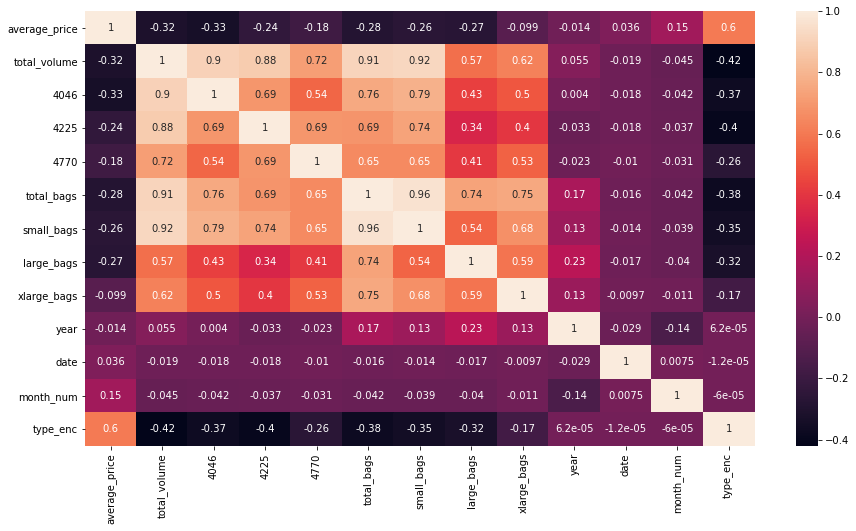

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Insight

Correlation: dependency strength between 2 variables

Adanya korelasi antara fitur satu dengan yang lain ditandai dengan nilai uji korelasi yang mendekati 1 (korelasi positif - berbanding lurus) dan/atau mendekati -1 (korelasi negatif - berbanding terbalik).

Dari heatmap di atas, fitur yang memiliki korelasi terhadap average_price:
- total_volume - korelasi negatif
- 4046 - korelasi negatif
- type - korelasi positif

## Pertimbangan feature selection

Salah satu pertimbangan lain untuk feature selection, selain relevansinya terhadap kolom target, adalah menghindari feature redundance dengan mempertimbangkan korelasi antar-fitur lain. Fitur yang memiliki korelasi satu sama lain bisa dihilangkan sebagian, karena dengan menghilangkan salah satunya, tidak mengurangi informasi esensial/utama yang akan digunakan mesin untuk train/belajar dan mendapatkan pola.

Pertimbangan-pertimbangan ini juga tetap mengacu pada tujuan awal pembuatan model

Tujuan model: **prediksi harga avocado untuk decision making perusahaan online grocery shop membuka lokasi service area yang baru**

Heatmap korelasi tidak mempertimbangkan fitur non-numerik: 
- city
- region

### Analisis

Fitur total_volume memiliki korelasi yang tinggi terhadap fitur 4046, yaitu 0, 9; sehingga menghilangkan salah satu fiturnya tidak mengurangi informasi esensial dari fitur yang lain. Fitur 4046 memberikan informasi tentang volume penjualan Hass avocado PLU 4046, sementara fitur total_volume merupakan informasi volume penjualan avocado berbagai tipe, termasuk tipe PLU 4046. Sehingga fitur total_volume dapat dianggap lebih sesuai dengan tujuan awal pembuatan model (model tidak spesifik hanya membuat prediksi harga terhadap avocado PLU tertentu)

- Kolom 'city' perlu jadi input machine learning karena tujuannya adalah mendapatkan prediksi harga sesuai kota
- Kolom 'region' - opsional, karena informasinya mirip dengan informasi dari kolom 'city' (redundant): sama-sama merupakan informasi lokasi. Namun lebih baik kolom ini dihilangkan, karena bisa jadi bias dalam proses machine learning.
- Fitur 'year' perlu diikutsertakan karena prediksi harga akan disesuaikan dengan tahun rencana Online Grocery Shopping expand service areanya. Fitur 'month' juga dipertahankan karena berdasarkan EDA, harga avocado mengalami fluktuasi musiman.

# Kesimpulan

Feature selected untuk diinput dalam machine learning model:
- total_volume
- type
- year
- city
- month